In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(2473643, 15)

In [4]:
data.columns

Index(['VehicleSearchedIndicator', 'ContrabandIndicator', 'Department Name',
       'InterventionDateTime', 'InterventionLocationName',
       'InterventionReasonCode', 'ReportingOfficerIdentificationID',
       'ResidentIndicator', 'SearchAuthorizationCode', 'StatuteReason',
       'SubjectAge', 'SubjectEthnicityCode', 'SubjectRaceCode',
       'SubjectSexCode', 'TownResidentIndicator'],
      dtype='object')

### Contraband Found by Subject Sex

In [5]:
contraband = data[data.ContrabandIndicator == 1].groupby('SubjectSexCode')['SubjectSexCode'].count().sort_values(ascending=False)#/(data.groupby('SubjectEthnicityCode')['SubjectEthnicityCode'].count().sort_values(ascending=False)[0])*100
all_data = data.groupby('SubjectSexCode')['SubjectSexCode'].count().sort_values(ascending=False)


subject_sex= []
subject_sex_idx = []
for i,j,k in zip(contraband, all_data, all_data.index):
    print(k,':',round(i/j*100, 2))
    subject_sex.append(round(i/j*100, 2))
    subject_sex_idx.append(k) 

M : 1.48
F : 0.57


Text(0.5, 1.0, 'Contraband Found by Subject Sex (Percentage for each sex in all data)')

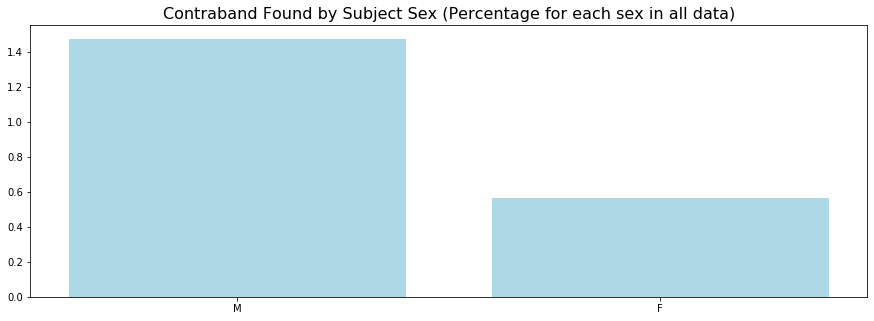

In [6]:
plt.figure(figsize=(15, 5))
plt.bar(subject_sex_idx, subject_sex,color='lightblue', edgecolor='white', width = 0.8)
plt.title('Contraband Found by Subject Sex (Percentage for each sex in all data)', size=16)

## Contraband Found by Subject Race

In [7]:
contraband = data[data.ContrabandIndicator == 1].groupby('SubjectRaceCode')['SubjectRaceCode'].count().sort_values(ascending=False)#/(data.groupby('SubjectEthnicityCode')['SubjectEthnicityCode'].count().sort_values(ascending=False)[0])*100
all_data = data.groupby('SubjectRaceCode')['SubjectRaceCode'].count().sort_values(ascending=False)


subject_race= []
subject_race_idx = []
for i,j,k in zip(contraband, all_data, all_data.index):
    print(k,':',round(i/j*100, 2))
    subject_race.append(round(i/j*100, 2))
    subject_race_idx.append(k) 

W : 1.02
B : 1.95
A : 0.37
I : 0.36


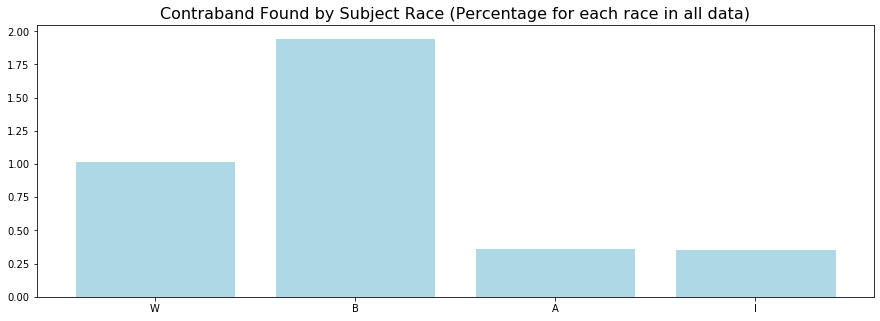

In [8]:
plt.figure(figsize=(15, 5))
plt.bar(subject_race_idx, subject_race,color='lightblue', edgecolor='white', width = 0.8)
plt.title('Contraband Found by Subject Race (Percentage for each race in all data)', size=16);

### Contraband Found by Subject Ethnicity

In [9]:
contraband = data[data.ContrabandIndicator == 1].groupby('SubjectEthnicityCode')['SubjectEthnicityCode'].count().sort_values(ascending=False)#/(data.groupby('SubjectEthnicityCode')['SubjectEthnicityCode'].count().sort_values(ascending=False)[0])*100
all_data = data.groupby('SubjectEthnicityCode')['SubjectEthnicityCode'].count().sort_values(ascending=False)


subject_ethnicity= []
subject_ethnicity_idx = []
for i,j,k in zip(contraband, all_data, all_data.index):
    print(k,':',round(i/j*100, 2))
    subject_ethnicity.append(round(i/j*100, 2))
    subject_ethnicity_idx.append(k) 

N : 1.07
H : 1.71
M : 0.57


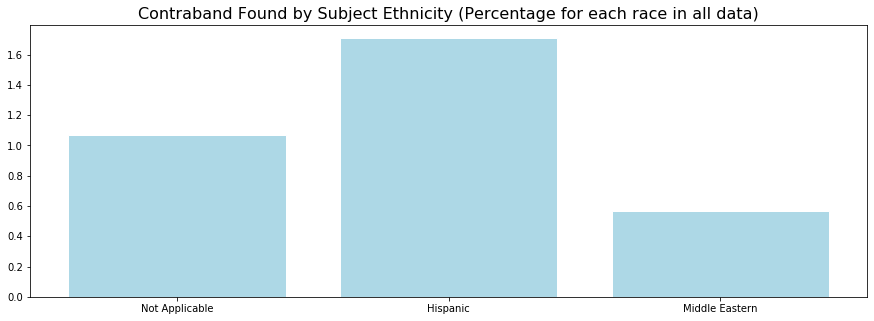

In [10]:
plt.figure(figsize=(15, 5))
plt.bar(['Not Applicable', 'Hispanic', 'Middle Eastern'], subject_ethnicity,color='lightblue', edgecolor='white', width = 0.8)
plt.title('Contraband Found by Subject Ethnicity (Percentage for each race in all data)', size=16);


### Statute Reason for Contraband Found

In [11]:
contraband = data[data.ContrabandIndicator == 1].groupby('StatuteReason')['StatuteReason'].count().sort_values(ascending=False)#/(data.groupby('SubjectEthnicityCode')['SubjectEthnicityCode'].count().sort_values(ascending=False)[0])*100
all_data = data.groupby('StatuteReason')['StatuteReason'].count().sort_values(ascending=False)


statute= []
statute_index = []
for i,j,k in zip(contraband, all_data, all_data.index):
    print(k,':',round(i/j*100, 2))
    statute.append(round(i/j*100, 2))
    statute_index.append(k) 

Speed Related : 0.72
Defective Lights : 1.58
Registration : 1.58
Cell Phone : 1.52
Moving Violation : 1.09
Traffic Control Signal : 1.08
Other : 0.85
Stop Sign : 0.85
STC Violation : 1.07
Seatbelt : 1.45
Display of Plates : 1.39
Other/Error : 2.13
Administrative Offense : 2.34
Window Tint : 1.09
Suspended License : 1.94
Unlicensed Operation : 1.8
Equipment Violation : 2.53


In [12]:
stat_ = {}
for i,j,k in zip(contraband, all_data, all_data.index):
    print(k,':',round(i/j*100, 2))
    stat_[k] = round(i/j*100, 2)
    
statute = {k: v for k, v in sorted(stat_.items(), key=lambda item: item[1], reverse=True)}

Speed Related : 0.72
Defective Lights : 1.58
Registration : 1.58
Cell Phone : 1.52
Moving Violation : 1.09
Traffic Control Signal : 1.08
Other : 0.85
Stop Sign : 0.85
STC Violation : 1.07
Seatbelt : 1.45
Display of Plates : 1.39
Other/Error : 2.13
Administrative Offense : 2.34
Window Tint : 1.09
Suspended License : 1.94
Unlicensed Operation : 1.8
Equipment Violation : 2.53


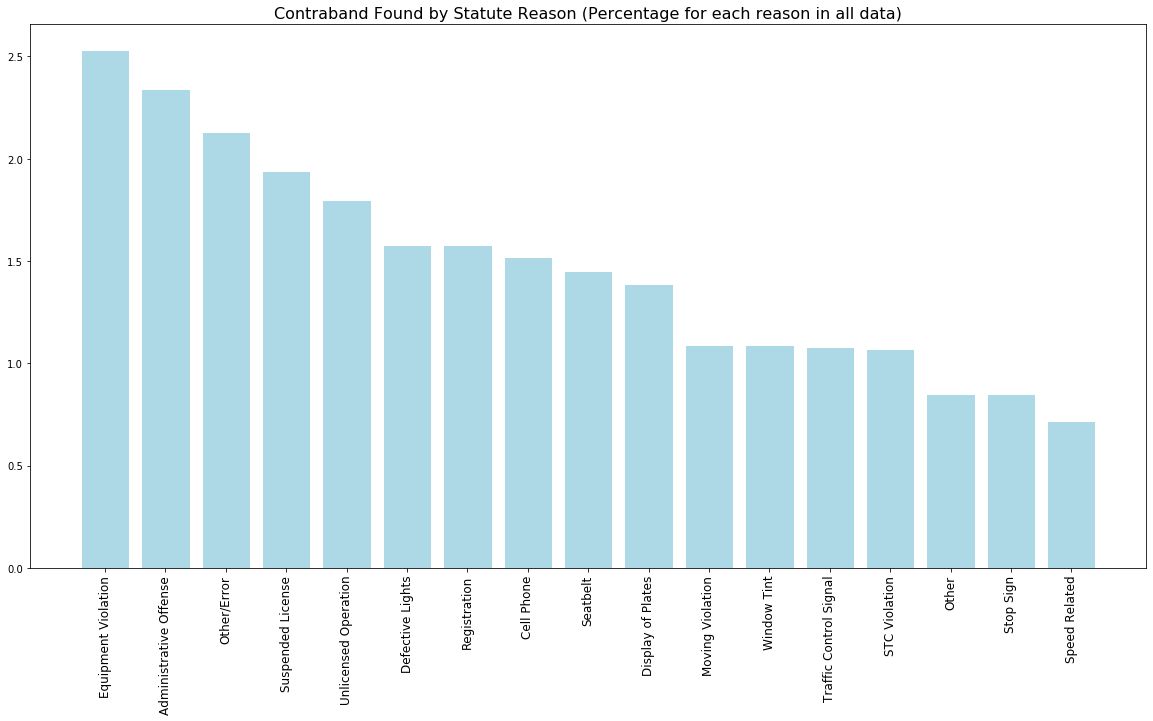

In [13]:
plt.figure(figsize=(20, 10))
plt.bar(statute.keys(), statute.values(),color='lightblue', edgecolor='white', width = 0.8)
plt.title('Contraband Found by Statute Reason (Percentage for each reason in all data)', size=16)
plt.xticks(rotation=90, size=12);


In [14]:
contraband = data[data.ContrabandIndicator == 1].groupby('InterventionReasonCode')['InterventionReasonCode'].count().sort_values(ascending=False)#/(data.groupby('SubjectEthnicityCode')['SubjectEthnicityCode'].count().sort_values(ascending=False)[0])*100
all_data = data.groupby('InterventionReasonCode')['InterventionReasonCode'].count().sort_values(ascending=False)

interv_ = {}
for i,j,k in zip(contraband, all_data, all_data.index):
    print(k,':',round(i/j*100, 2))
    interv_[k] = round(i/j*100, 2)
    
intervention = {k: v for k, v in sorted(interv_.items(), key=lambda item: item[1])}

V : 0.96
E : 2.06
I : 4.62


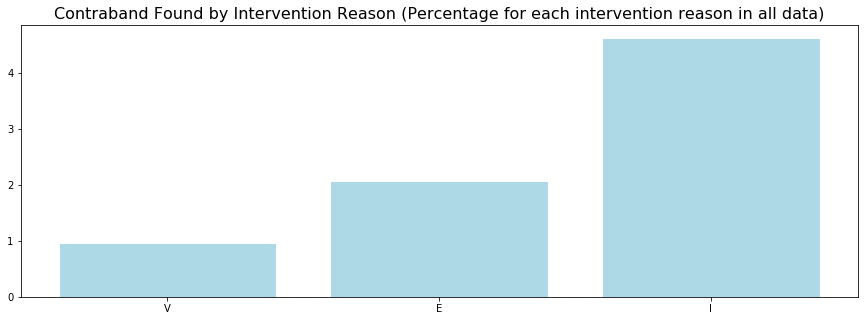

In [15]:
plt.figure(figsize=(15, 5))
plt.bar(intervention.keys(), intervention.values(),color='lightblue', edgecolor='white', width = 0.8)
plt.title('Contraband Found by Intervention Reason (Percentage for each intervention reason in all data)', size=16);


### Contraband Found Search Authorization Code

In [16]:
search_auth = data.groupby('SearchAuthorizationCode')['VehicleSearchedIndicator', 'ContrabandIndicator'].sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
search_auth['RatioContrabandVehicle'] = round(search_auth['ContrabandIndicator']/search_auth['VehicleSearchedIndicator'],2)

In [18]:
search_auth.sort_values(by='RatioContrabandVehicle', ascending=False)

,VehicleSearchedIndicator,ContrabandIndicator,RatioContrabandVehicle
SearchAuthorizationCode,,,
N,3290.0,3183.0,0.97
O,30670.0,16412.0,0.54
C,27063.0,6849.0,0.25
I,15710.0,1897.0,0.12


### False Positive Rate Calculations for Protected Clases

In [19]:
data_vehicle_searched = data[data.VehicleSearchedIndicator == 1]
data_vehicle_not_searched = data[data.VehicleSearchedIndicator == 0]

TP = data_vehicle_searched[data_vehicle_searched.ContrabandIndicator == 1]
FP = data_vehicle_searched[data_vehicle_searched.ContrabandIndicator == 0]
TN = data_vehicle_not_searched[data_vehicle_not_searched.ContrabandIndicator == 0]
FN =  data_vehicle_not_searched[data_vehicle_not_searched.ContrabandIndicator == 1]

In [20]:
def plot_fpr(false_positives, true_negatives, prot_class):    
    
    FPR = false_positives.groupby(false_positives[prot_class])[prot_class].count()/(false_positives.groupby(false_positives[prot_class])[prot_class].count() + true_negatives.groupby(true_negatives[prot_class])[prot_class].count())

    plt.figure(figsize=(15, 5))
    sns.barplot(FPR.index, FPR.values)

    pal = sns.color_palette("Reds_d", len(FPR))
    ax = sns.barplot(FPR.index, FPR.values, palette=np.array(pal[::-1]))

    ax.set(xlabel=prot_class, ylabel='FPR')
    plt.show()

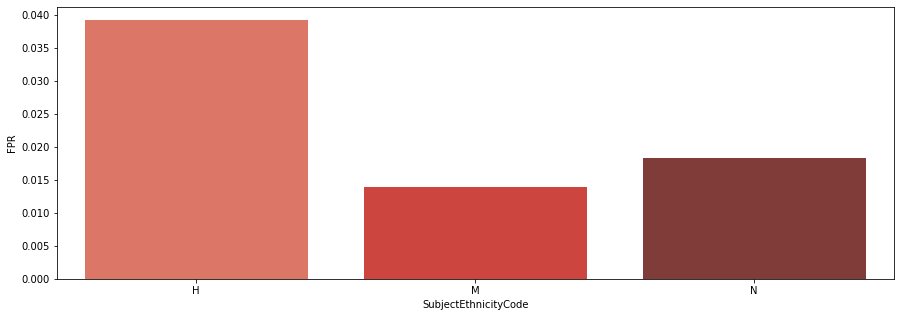

In [21]:
plot_fpr(FP, TN,'SubjectEthnicityCode')

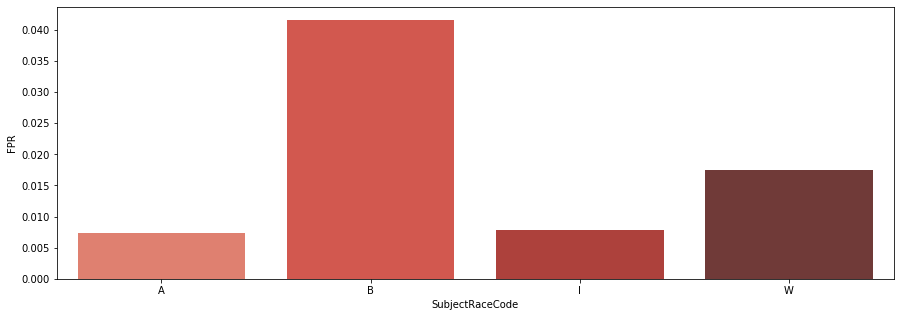

In [22]:
plot_fpr(FP, TN,'SubjectRaceCode')

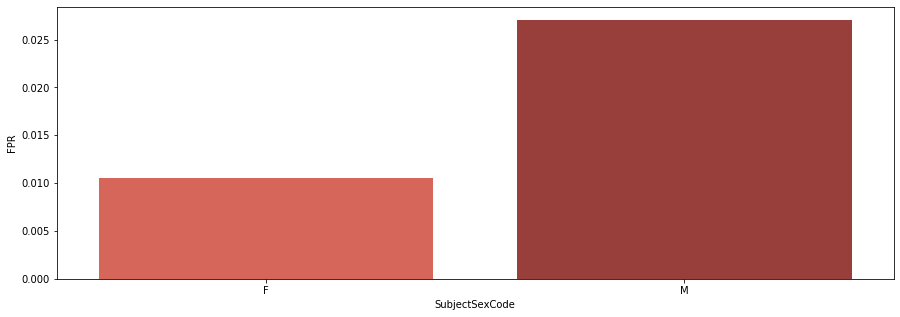

In [23]:
plot_fpr(FP, TN,'SubjectSexCode')

In [24]:
data.InterventionDateTime = pd.to_datetime(data.InterventionDateTime, format='%m/%d/%Y %I:%M:%S %p')

In [25]:
data = data.assign(HourDay = data.InterventionDateTime.dt.hour
                         + data.InterventionDateTime.dt.minute / 60,
                         DayWeek = data.InterventionDateTime.dt.dayofweek,
                         Month = data.InterventionDateTime.dt.month,
                        Year = data.InterventionDateTime.dt.year
                        )

In [26]:
df = data.set_index('InterventionDateTime')

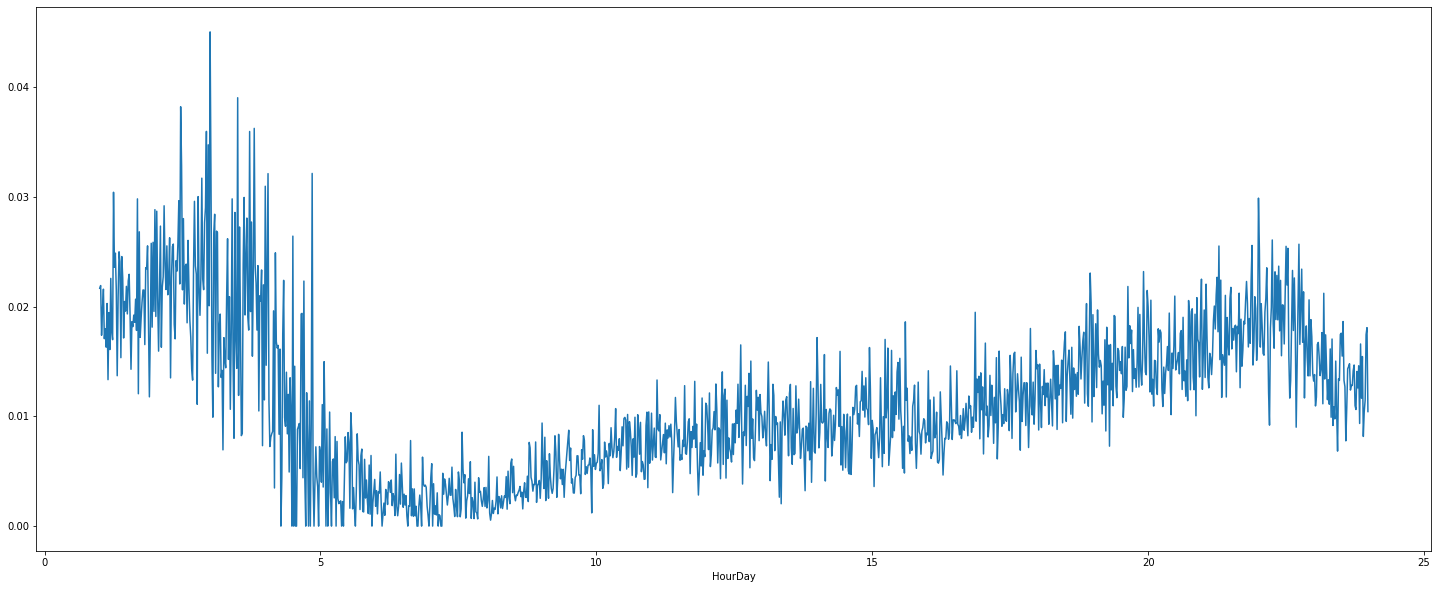

In [27]:
df.groupby('HourDay')['ContrabandIndicator'].mean()[1:].plot(figsize=(25, 10));

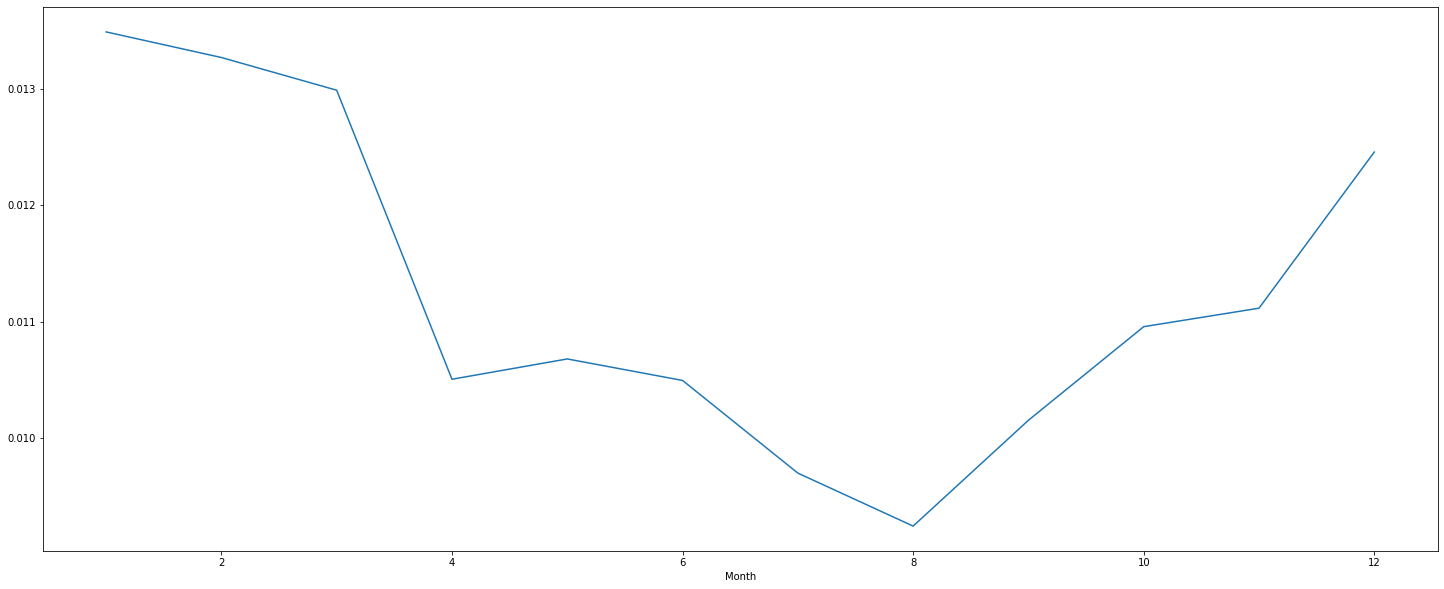

In [28]:
df.groupby('Month')['ContrabandIndicator'].mean().plot(figsize=(25, 10));

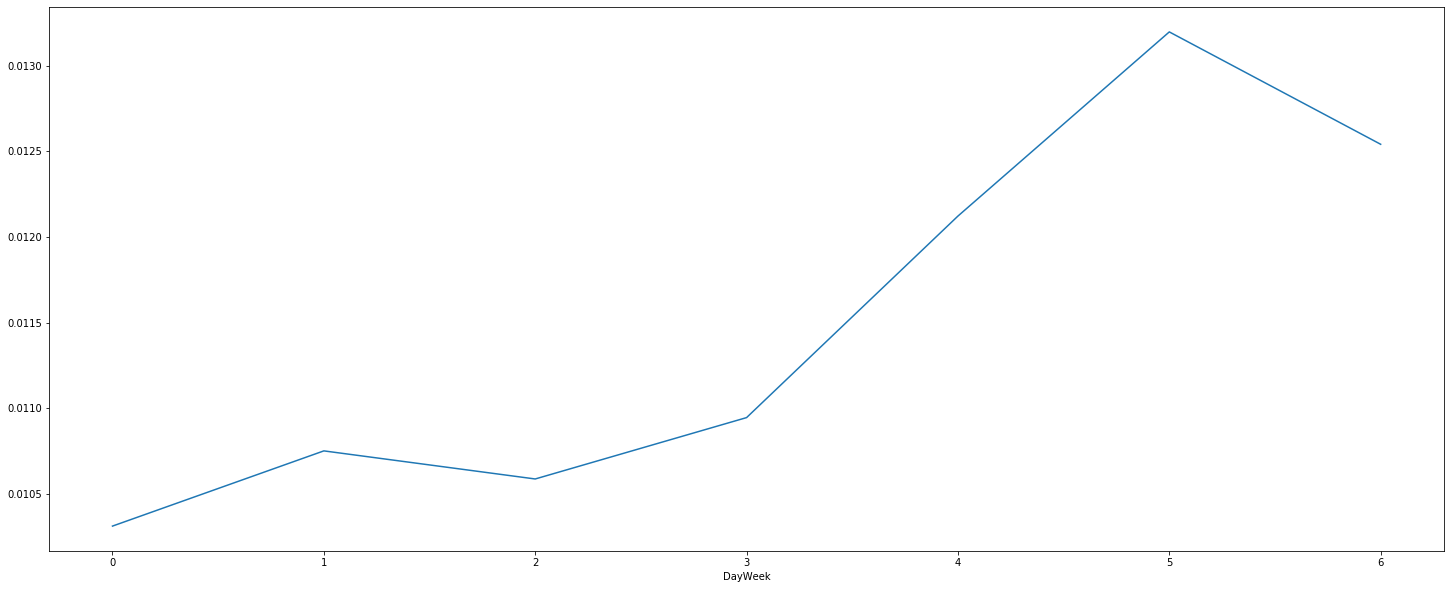

In [29]:
df.groupby('DayWeek')['ContrabandIndicator'].mean().plot(figsize=(25, 10));